# TP Morphologie mathématique / Squelettisation / Segmentation

In [31]:
from skimage import filters
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage import data
from skimage.util import img_as_ubyte
from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat,remove_small_objects,remove_small_holes)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
import cv2 as cv
from skimage.color import rgb2gray
from skimage import data
import PIL.ImageOps
from PIL import Image, ImageChops 
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

### Morphologie mathématique tout ou rien

In [32]:
noisy_gray = io.imread('noisy_yin_yang.png')

In [34]:
cell = io.imread('cell.png')

In [35]:
qrCode = io.imread('QRCode.png')

In [36]:
yin_yang = io.imread('yin_yang.png')

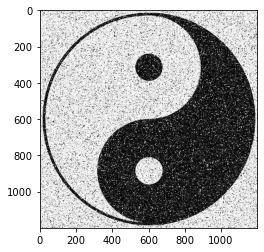

In [37]:
plt.imshow(noisy_gray,cmap='gray')

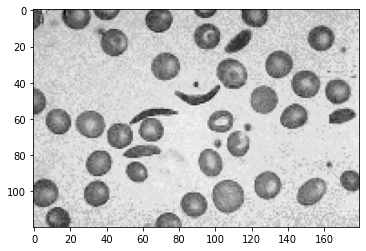

In [27]:
plt.imshow(cell,cmap='gray')

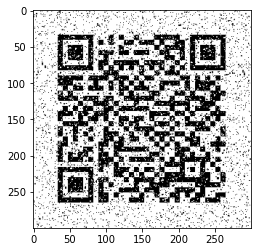

In [28]:
plt.imshow(qrCode,cmap='gray')

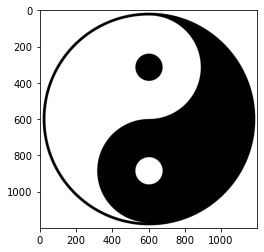

In [29]:
plt.imshow(yin_yang[:,:,0],cmap='gray')

In [38]:
def inverse(img):
    I_max = 255
    inv_img = I_max - img 
    return inv_img

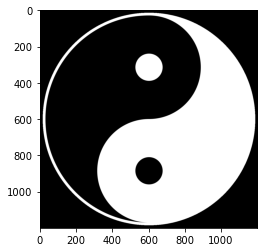

In [11]:
plt.imshow(inverse(yin_yang)[:,:,0],cmap='gray')

In [39]:
print(yin_yang[:,:,0].shape)

(1200, 1200)


In [13]:
noisy_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255,   0, ..., 255,   0, 255]], dtype=uint8)

In [14]:
noisy_gray.shape

(1200, 1200)

### Binarisation de l'image

In [40]:
seuil = filters.threshold_otsu(noisy_gray)

In [41]:
noisy_grayB = noisy_gray > seuil

In [42]:
print(noisy_grayB)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True False ...  True False  True]]


In [43]:
noisy_grayB2 = noisy_gray < seuil

In [44]:
print(noisy_grayB2)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True False False]
 [False False  True ... False False False]
 [False False  True ... False  True False]]


In [45]:
noisy_grayB=noisy_grayB.astype('uint8')

In [46]:
noisy_grayB2=noisy_grayB2.astype('uint8')

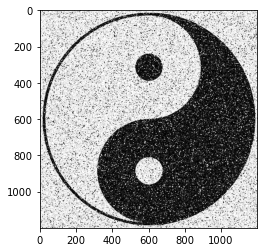

In [47]:
plt.imshow(noisy_grayB,cmap='gray')

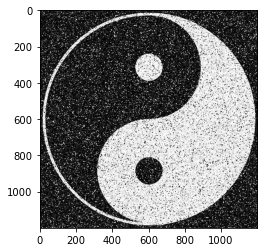

In [23]:
plt.imshow(noisy_grayB2,cmap='gray')

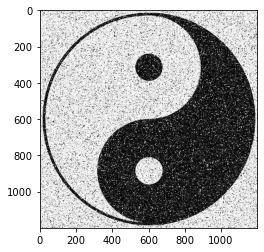

In [24]:
plt.imshow(noisy_gray,cmap='gray')

In [25]:
noisy_grayB.shape

(1200, 1200)

In [48]:
seuil = filters.threshold_otsu(yin_yang)
yin_yangB = yin_yang > seuil
yin_yangB=yin_yangB.astype('uint8')

<ipython-input-48-6cbae1e6c710>:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1200, 1200, 4) looks like an RGB image
  seuil = filters.threshold_otsu(yin_yang)


In [49]:
seuil = filters.threshold_otsu(qrCode)
qrCodeB = qrCode > seuil
qrCodeB=qrCodeB.astype('uint8')

In [50]:
seuil = filters.threshold_otsu(cell)
cellB = cell > seuil
cellB=cellB.astype('uint8')

In [51]:
def plot_comparison(original, filtered, filter_name,original_n):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original,cmap='gray')
    ax1.set_title(original_n)
    ax1.axis('off')
    ax2.imshow(filtered,cmap='gray')
    ax2.set_title(filter_name)
    ax2.axis('off')

### Vérification des relations

Intersection [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unio [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


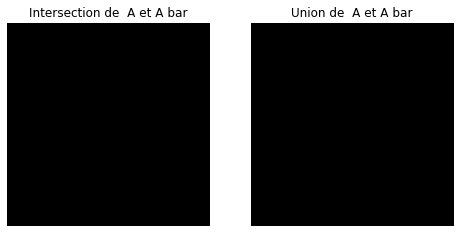

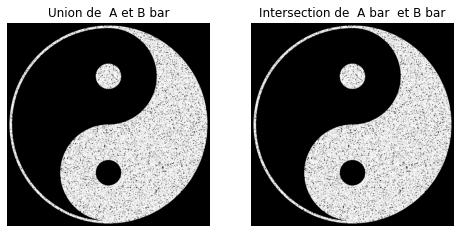

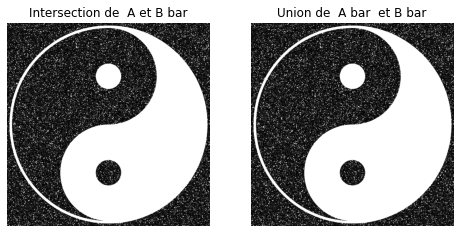

In [52]:
img_bwaA = cv.bitwise_and(inverse(yin_yangB)[:,:,0],yin_yangB[:,:,0])
img_bwoA = cv.bitwise_or(inverse(yin_yangB[:,:,0]),yin_yangB[:,:,0])
print('Intersection',img_bwaA)
print('Unio',img_bwoA)


img_bwoAB = cv.bitwise_or(noisy_grayB,yin_yangB[:,:,0])
inv_img_bwoAB=inverse(img_bwoAB)
img_bwaAbBb = cv.bitwise_and(inverse(noisy_grayB),inverse(yin_yangB[:,:,0]))

img_bwaAB = cv.bitwise_and(noisy_grayB,yin_yangB[:,:,0])
inv_img_bwaAB=inverse(img_bwaAB)
img_bwoAbBb = cv.bitwise_or(inverse(noisy_grayB),inverse(yin_yangB[:,:,0]))

plot_comparison(img_bwaA,img_bwoA,"Union de  A et A bar","Intersection de  A et A bar")
plot_comparison(inv_img_bwoAB,img_bwaAbBb,"Intersection de  A bar  et B bar","Union de  A et B bar")
plot_comparison(inv_img_bwaAB,img_bwoAbBb,"Union de  A bar  et B bar","Intersection de  A et B bar")

### Résultat Ou Exclusif

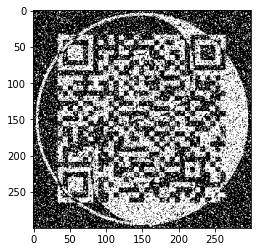

In [53]:
noisy_gray_res = cv.resize(noisy_grayB, dsize=(300, 300), interpolation=cv.INTER_CUBIC)
img_bwx = cv.bitwise_xor(noisy_gray_res,qrCodeB)
plt.imshow(img_bwx,cmap='gray')


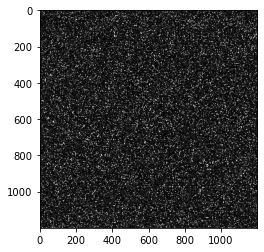

In [54]:
img_bwx = cv.bitwise_xor(noisy_grayB,yin_yangB[:,:,0])
plt.imshow(img_bwx,cmap='gray')

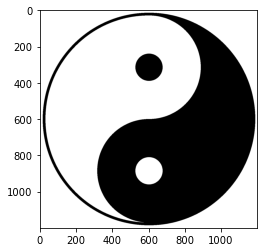

In [57]:
img_bwx2 = cv.bitwise_xor(noisy_grayB,img_bwx)
plt.imshow(img_bwx2,cmap='gray')

### le OU exclusif d'une image et sa version bruitée par un bruit salt & pepper donne le bruit. et pour retirer le bruit d'une image bruitée il suffit de faire le OU exclusif de cette image bruitée et le bruit.

### Définition d'un élément structurant

In [58]:
ES=np.zeros((3,3))

In [59]:
ES[0,1]=1
ES[1,1]=1
ES[1,0]=1
ES[1,2]=1
ES[2,1]=1

In [60]:
ES

array([[0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 0.]])

#### Erosion

In [61]:
def erosion(img,ES,pos):
    imgS=np.zeros((img.shape[0],img.shape[1]))
    m=pos[0]
    n=pos[1]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j]==ES[m,n]:
                Ones=np.where(ES==1)
                nbreOnes=len(Ones[0])
                nbreConf=0
                for l in range(nbreOnes):
                    a=Ones[0][l]
                    b=Ones[1][l]
                    if img[a,b]==1:
                        nbreConf=nbreConf+1
                if nbreConf==nbreOnes:
                    imgS[i,j]=1
    return imgS      

In [62]:
def erosion2(img,ES):
    F1=False
    F2=False
    F3=False
    imgS=np.zeros((img.shape[0],img.shape[1]))
    ESB=ES.astype(np.bool)
    if ES.shape==(1,3):
        F1=True
        ESB=ESB[0]
    else: 
        if ES.shape==(3,1):
            F2=True
            ESB=ESB[:,0]
        else:
            if ES.shape==(3,3):
                F3=True
    nbES=len(np.where(ES==1)[0])

    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            
            if F3==True:
                A=img[i-1:i+2,j-1:j+2]
            if F1==True:
                A=img[i,j-1:j+2]
            if F2==True:
                A=img[i-1:i+2,j]
            if A[ESB].tolist().count(1)==nbES:
                imgS[i,j]=1
           
    return imgS      

In [64]:
maskBEr=erosion(noisy_grayB,ES,(1,1))

In [65]:
maskBEr2=erosion2(noisy_grayB,ES)

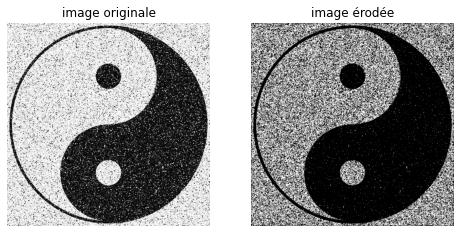

In [66]:
plot_comparison(noisy_grayB,maskBEr2,"image érodée","image originale")

#### L'image en entrée est bruitée en poivre et sel, l'image érodée résultante est plus foncée.le bruit noir en fait s'est accentué dans l'image érodée.

#### Dilatation

In [34]:
def dilatation(img,ES):
    F1=False
    F2=False
    F3=False
    ESB=ES.astype(np.bool)
    imgS=np.zeros((img.shape[0],img.shape[1]))
    if ES.shape==(1,3):
        F1=True
        ESB=ESB[0]
    else: 
        if ES.shape==(3,1):
            F2=True
            ESB=ESB[:,0]
        else:
            if ES.shape==(3,3):
                F3=True
        
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if F3==True:
                A=img[i-1:i+2,j-1:j+2]
            if F1==True:
                A=img[i,j-1:j+2]
            if F2==True:
                A=img[i-1:i+2,j]
            #print(A)
            if A[ESB].tolist().count(1)>=1:
                imgS[i,j]=1
      
    return imgS      

In [68]:
maskBDil=dilatation(noisy_grayB,ES)

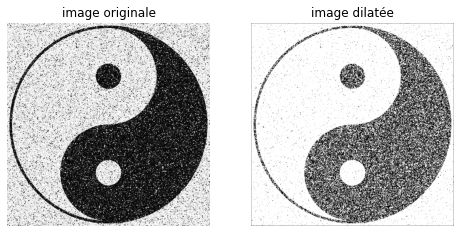

In [69]:
plot_comparison(noisy_grayB,maskBDil,"image dilatée","image originale")

#### L'image en entrée est bruitée en poivre et sel, l'image dilatée résultante est plus claire.le bruit blanc en effet s'est accentué dans l'image dilatée.

#### Manipulations

In [35]:
F1=np.ones((1,3))

In [36]:
F2=np.ones((3,1))

In [37]:
F3=np.ones((3,3))

F3[0,0]=0
F3[2,0]=0
F3[2,2]=0
F3[0,2]=0


In [38]:
F4=np.ones((3,3))

In [74]:
maskBErF1=erosion2(noisy_grayB,F1)
maskBErF2=erosion2(noisy_grayB,F2)
maskBErF3=erosion2(noisy_grayB,F3)
maskBErF4=erosion2(noisy_grayB,F4)

In [75]:
maskBDilF1=dilatation(noisy_grayB,F1)
maskBDilF2=dilatation(noisy_grayB,F2)
maskBDilF3=dilatation(noisy_grayB,F3)
maskBDilF4=dilatation(noisy_grayB,F4)

In [39]:
def plot_comparison2(O,A, B,C,D, NameO, NameA,NameB,NameC,NameD):

    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, figsize=(10, 15), sharex=True,
                                   sharey=True)
    ax1.imshow(O,cmap='gray')
    ax1.set_title(NameO)
    ax1.axis('off')
    ax2.imshow(A,cmap='gray')
    ax2.set_title(NameA)
    ax2.axis('off')
    ax3.imshow(B,cmap='gray')
    ax3.set_title(NameB)
    ax3.axis('off')
    ax4.imshow(C,cmap='gray')
    ax4.set_title(NameC)
    ax4.axis('off')
    ax5.imshow(D,cmap='gray')
    ax5.set_title(NameD)
    ax5.axis('off')

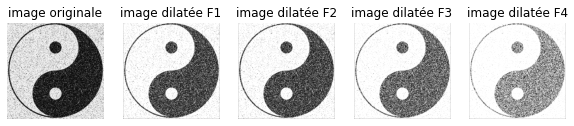

In [77]:
plot_comparison2(noisy_grayB,maskBDilF1,maskBDilF2,maskBDilF3,maskBDilF4,"image originale","image dilatée F1","image dilatée F2","image dilatée F3","image dilatée F4")

### On remarque que dépendamment de la taille du filtre et de son niveau de connexité, le bruit blanc se propage d'avantage.

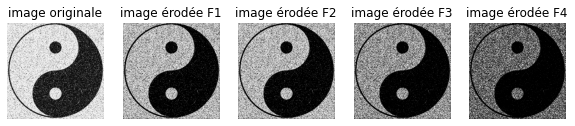

In [78]:
plot_comparison2(noisy_grayB,maskBErF1,maskBErF2,maskBErF3,maskBErF4,"image originale","image érodée F1","image érodée F2","image érodée F3","image érodée F4")

### On remarque que dépendamment de la taille du filtre et de son niveau de connexité, le bruit noir se propage d'avantage et l'image devient de plus en plus foncé.

### Le dilaté - image originale

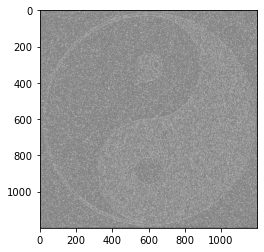

In [79]:
plt.imshow(maskBDilF2-noisy_grayB,cmap='gray')

### L'érodé  - image originale

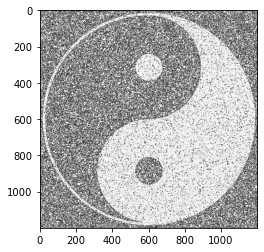

In [80]:
plt.imshow(maskBErF4-noisy_grayB,cmap='gray')

In [64]:
B1=np.ones((3,3),np.uint8)
C1=cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
B3=np.ones((5,5),np.uint8)
C3=np.ones((5,5),np.uint8)

In [65]:
C3[0,0]=0
C3[4,0]=0
C3[0,4]=0
C3[4,4]=0

In [66]:
C3

array([[0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0]], dtype=uint8)

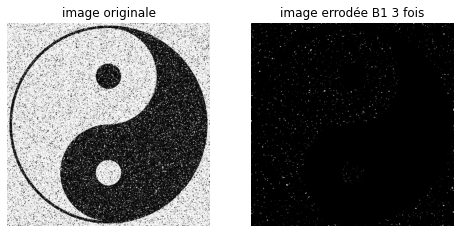

In [147]:
n=3
D=cv.erode(noisy_grayB,B1,iterations = n)
plot_comparison(noisy_grayB,D,"image errodée B1 {} fois".format(n),"image originale")

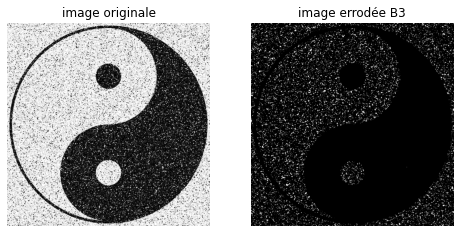

In [148]:
Img_Er3=cv.erode(noisy_grayB, B3) 
plot_comparison(noisy_grayB,Img_Er3,"image errodée B3","image originale")

### L'application de l'érosion 3 fois avec l'élément structurant B1 , ne donne pas le même résultat de l'application de l'érosion une seule fois avec l'élément structurant B3

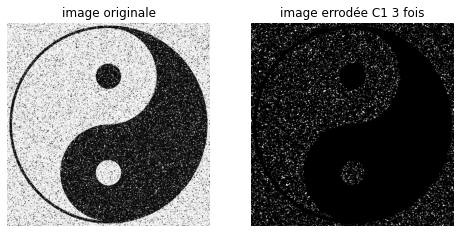

In [149]:
n=3
Img_pEr=cv.erode(noisy_grayB,C1,iterations = n)
plot_comparison(noisy_grayB,Img_pEr,"image errodée C1 {} fois".format(n),"image originale")

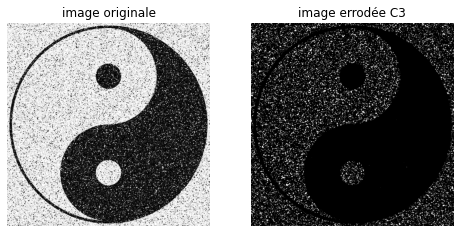

In [150]:
Img_Er3=cv.erode(noisy_grayB, C3) 
plot_comparison(noisy_grayB,Img_Er3,"image errodée C3","image originale")

### l'application de l'érosion 3 fois avec l'élément structurant B1 , donne presque le même résultat de l'application de l'érosion une seule fois avec l'élément structurant B3

### Dualité Fond-Forme

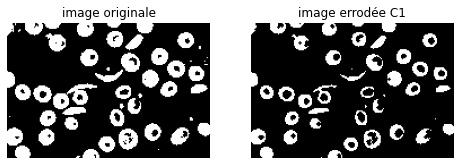

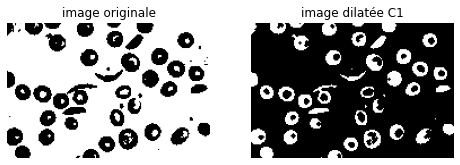

In [67]:
Img_Er1=cv.erode(255-cellB, C1)
Img_Dil1=cv.dilate(cellB, C1)
plot_comparison(255-cellB,Img_Er1,"image errodée C1","image originale")
plot_comparison(cellB,255-Img_Dil1,"image dilatée C1","image originale")

### Dilatation du fond correspond logiquement à l'érosion de l'objet.
### Car l'érosion permet de réduire la taille de l'objet , faire disparaitre les plus petits objets.
### Car dilatation permet de d'augmenter la taille de l'objet.

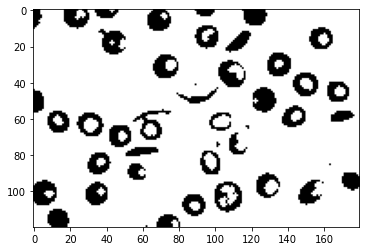

In [68]:
plt.imshow(Img_Dil1,cmap='gray')

### Ouverture et fermeture

In [70]:
openingtxt = cv.morphologyEx(noisy_grayB, cv.MORPH_OPEN, C1)

In [71]:
closingtxt = cv.morphologyEx(openingtxt, cv.MORPH_CLOSE, C1)

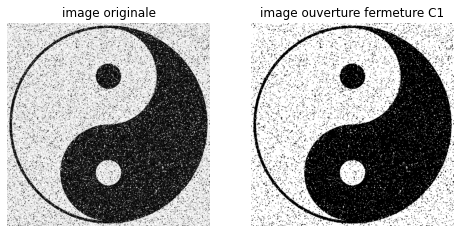

In [72]:
plot_comparison(noisy_grayB,closingtxt,"image ouverture fermeture C1","image originale")

### En appliquant l'ouverture et la fermeture avec l'élémént structurant B1, on constate la réduction du bruit dans l'image résultante

In [154]:
openingtxt = cv.morphologyEx(noisy_grayB, cv.MORPH_OPEN, C3)

In [155]:
closingtxt = cv.morphologyEx(openingtxt, cv.MORPH_CLOSE, C3)

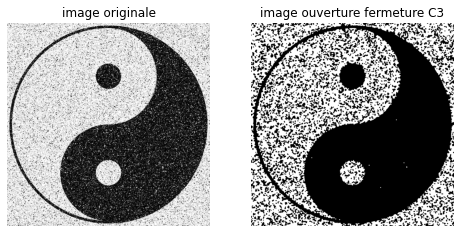

In [156]:
plot_comparison(noisy_grayB,closingtxt,"image ouverture fermeture C3","image originale")

### En appliquant l'ouverture et la fermeture avec l'élémént structurant B3, on constate l'accentuation du bruit dans l'image résultante

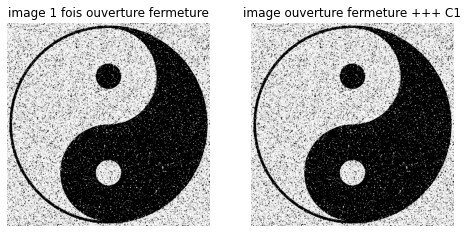

In [157]:
openingtxt = cv.morphologyEx(noisy_grayB, cv.MORPH_OPEN, C1)
openingtxt1 = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
openingtxt = cv.morphologyEx(openingtxt, cv.MORPH_OPEN, C1)
plot_comparison(openingtxt1,openingtxt,"image ouverture fermeture +++ C1","image 1 fois ouverture fermeture")

## Degré d'intériorité

In [73]:
D=cv.erode(noisy_grayB,B1)

In [74]:
print(D)

[[1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [75]:
def degreInter(img):
    degreMatrix=np.zeros((img.shape[0],img.shape[1]))    
    D=cv.erode(img,B1)
    k=0
    kmax=30000
    while (cv.erode(D,B1)!=D).any() and k<=kmax:
        D=cv.erode(D,B1)
        k=k+1
        degreMatrix=degreMatrix+D
    return degreMatrix

In [76]:
Res=degreInter(yin_yangB[:,:,0])

In [77]:
print(Res)

[[184. 184. 183. ... 183. 184. 184.]
 [184. 183. 183. ... 183. 183. 184.]
 [183. 183. 182. ... 182. 183. 183.]
 ...
 [183. 183. 182. ... 182. 183. 183.]
 [184. 183. 183. ... 183. 183. 184.]
 [184. 184. 183. ... 183. 184. 184.]]


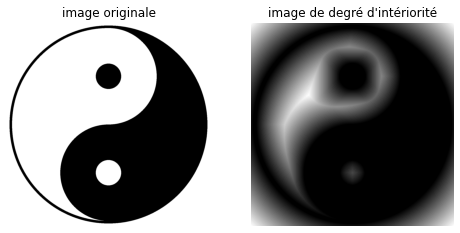

In [79]:
plot_comparison(yin_yangB[:,:,0],openingtxt,"image de degré d'intériorité","image originale")
plt.imshow(Res,cmap='gray')

## Squelette

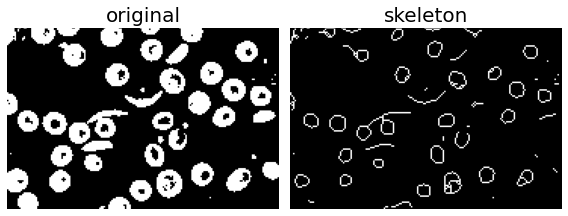

In [241]:
# Inversion de l'image
# Binarisation de l'image
seuil = filters.threshold_otsu(cell)
mask = cell < seuil
# skeletisation
skeleton = skeletonize(mask)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(mask, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

## Mophologie mathématique en niveau de gris

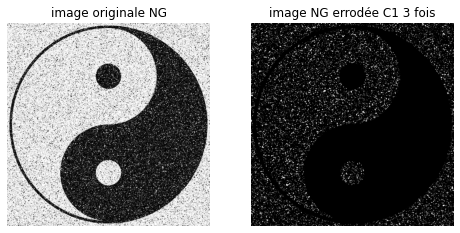

In [82]:
n=3
Img_pEr=cv.erode(noisy_gray,C1,iterations = n)
plot_comparison(noisy_gray,Img_pEr,"image NG errodée C1 {} fois".format(n),"image originale NG")

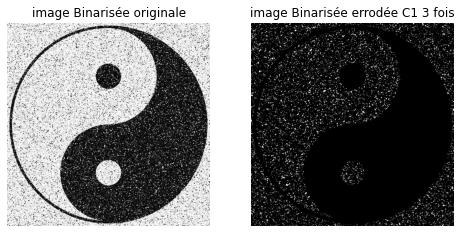

In [83]:
n=3
Img_pEr=cv.erode(noisy_grayB,C1,iterations = n)
plot_comparison(noisy_grayB,Img_pEr,"image Binarisée errodée C1 {} fois".format(n),"image Binarisée originale")

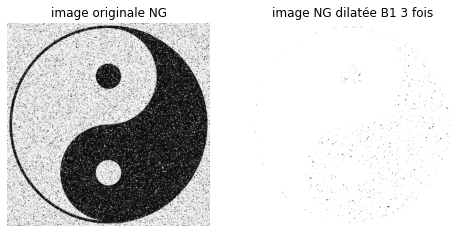

In [86]:
n=3
Img_pEr=cv.dilate(noisy_gray,B1,iterations = n)
plot_comparison(noisy_gray,Img_pEr,"image NG dilatée B1 {} fois".format(n),"image originale NG")

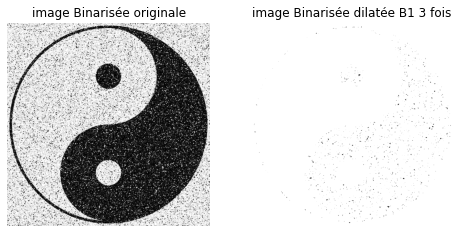

In [88]:
n=3
Img_pEr=cv.dilate(noisy_grayB,B1,iterations = n)
plot_comparison(noisy_grayB,Img_pEr,"image Binarisée dilatée B1 {} fois".format(n),"image Binarisée originale")

In [89]:
openingtxt = cv.morphologyEx(noisy_grayB, cv.MORPH_OPEN, C3)

In [90]:
closingtxt = cv.morphologyEx(openingtxt, cv.MORPH_CLOSE, C3)

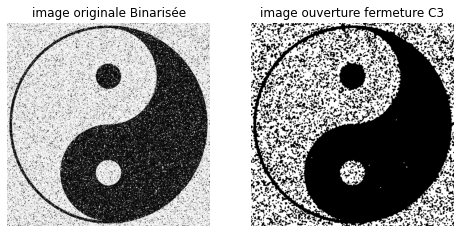

In [91]:
plot_comparison(noisy_grayB,closingtxt,"image ouverture fermeture C3","image originale Binarisée")

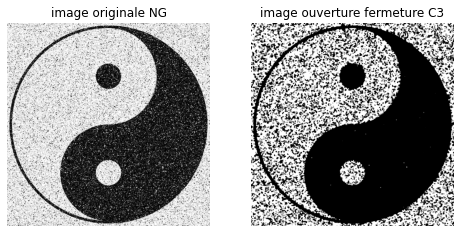

In [92]:
openingtxt = cv.morphologyEx(noisy_gray, cv.MORPH_OPEN, C3)

closingtxt = cv.morphologyEx(openingtxt, cv.MORPH_CLOSE, C3)

plot_comparison(noisy_gray,closingtxt,"image ouverture fermeture C3","image originale NG")

####  En comparant, on ne voit pas une différence au niveau du résultat lors de l'application de l'érosion ou la dilatation ou l'ouverture , fermeture sur une image binarisé ou en niveau de gris